In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Richardson model for asymmetric bell curve
Y=rKexp(-r(t-tm))/((1+exp(-r(t-tm)))^(1/v)(1+exp(-r(t-tm))))

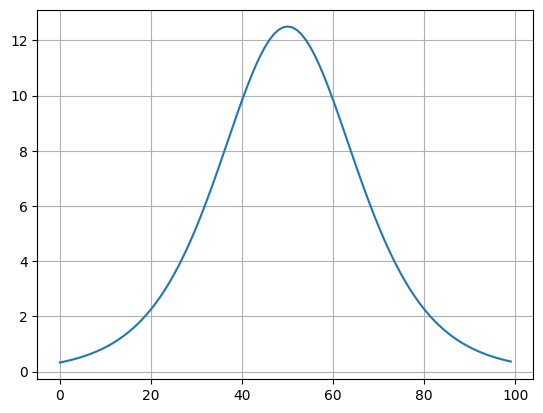

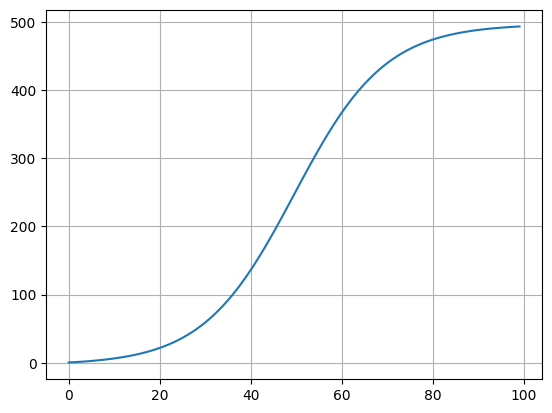

In [3]:
# Loglet example

# Richard bell curve
K = 500
r = 0.1
tm = 50
nu = 1

T= 100
t= np.arange(0,T)
y= r*K*np.exp(-r*(t-tm))/((1+np.exp(-r*(t-tm)))**(1/nu)*(1+np.exp(-r*(t-tm))))

plt.figure()
plt.plot(t,y)
plt.grid(True)

# Riciard S curve
d = 0
Y=np.cumsum(y)+d
plt.figure()
plt.plot(t,Y)
plt.grid(True)

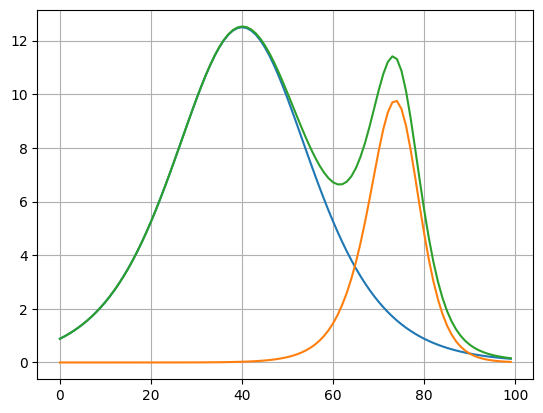

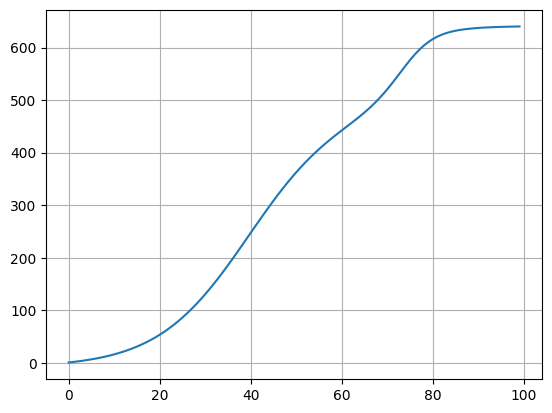

In [4]:
# Loglet sum example

# Richard bell curve
K = 500
r = 0.1
tm = 40
nu = 1

T= 100
t= np.arange(0,T)
y1= r*K*np.exp(-r*(t-tm))/((1+np.exp(-r*(t-tm)))**(1/nu)*(1+np.exp(-r*(t-tm))))

K = 100
r = 0.3
tm = 75
nu = 1.5
y2= r*K*np.exp(-r*(t-tm))/((1+np.exp(-r*(t-tm)))**(1/nu)*(1+np.exp(-r*(t-tm))))

plt.figure()
plt.plot(t,y1)
plt.plot(t,y2)
plt.plot(t,y1+y2)
plt.grid(True)

# Riciard S curve
d = 0
Y1=np.cumsum(y1)+d
Y2=np.cumsum(y2)+d
plt.figure()
plt.plot(t,Y1+Y2)
plt.grid(True)

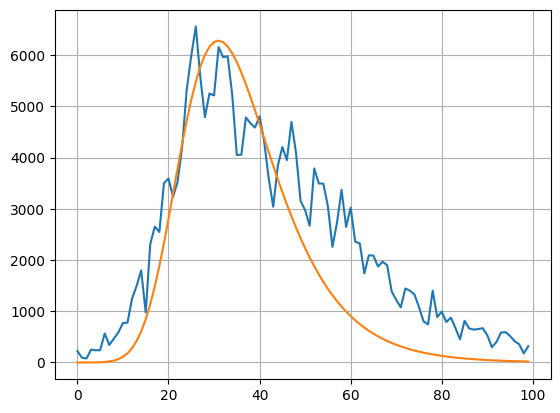

In [5]:
# Import data
national_data=pd.read_csv('..\data\dati-andamento-nazionale\dpc-covid19-ita-andamento-nazionale.csv')
new_pos=national_data['nuovi_positivi'].values

# Richard bell curve
K = 3500000
r = 0.1
tm = 1
nu = 0.05

T= 100
t= np.arange(0,T)
y= r*K*np.exp(-r*(t-tm))/((1+np.exp(-r*(t-tm)))**(1/nu)*(1+np.exp(-r*(t-tm))))

plt.figure()
plt.plot(new_pos[0:T])
plt.plot(y)
plt.grid(True)




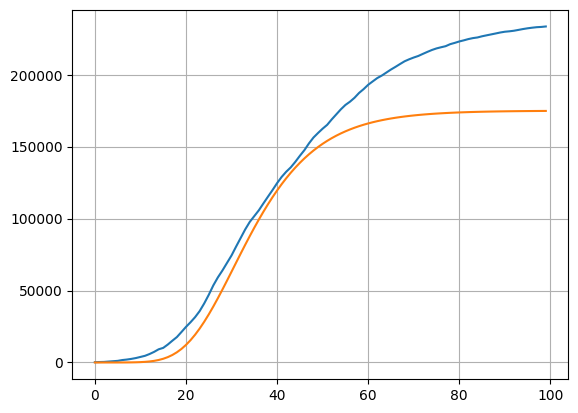

In [6]:
# Cumulative

tot_pos=np.cumsum(new_pos)
Y=np.cumsum(y)

plt.figure()
plt.plot(tot_pos[0:T])
plt.plot(Y)
plt.grid(True)

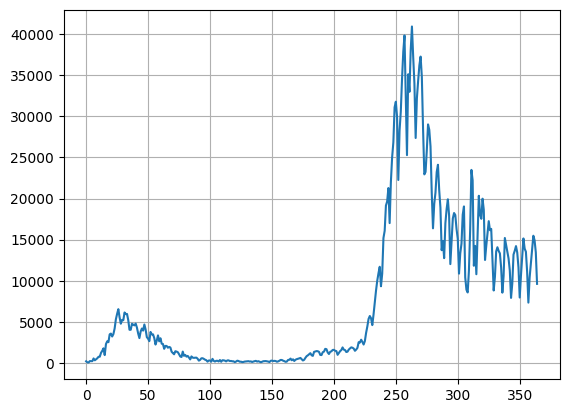

In [8]:
plt.figure()
plt.plot(new_pos[0:365])
plt.grid(True)